## Read the densities

In [31]:
import os
import numpy as np
import csv
import h5py
import matplotlib.pyplot as plt

density_dict = {}
#for r in [28,27,23,19,15,14]: 
for j in os.listdir('./datasets/Density_ex/'):#+str(r)): 
    den=[]
    print(j)
    with open('./datasets/Density_ex/'+str(j)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:        
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
            else: 
                den= np.append(den,row)   #list of strings
            line_count += 1  
    Den=list(map(float,den))              #list of float values
    density= np.reshape(Den,(50,50,50))
    
    density_dict[j] = density

0.csv
Column names are density
1.csv
Column names are density
10.csv
Column names are density
64.csv
Column names are density


(50, 50, 50)


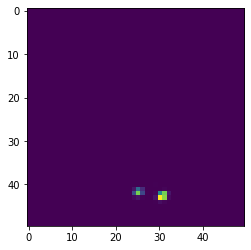

In [48]:
print(density.shape)
plt.figure()
plt.imshow(density_dict["10.csv"][:,:,3])

## Read the target variables

In [33]:
for i in [28]:#,23,19,15,14,12]: 
    with open('./datasets/labels/28/labels.csv') as csv_file:
        csv_reader = list(csv.reader(csv_file, delimiter=','))
        MR=np.asarray(csv_reader[1])
        SR=np.asarray(csv_reader[3])
        MR=MR.astype(np.float)
        SR=SR.astype(np.float)
#             row_count= sum(1 for row_ in csv_reader)

In [34]:
print(MR[0], MR[1], MR[10], MR[64])

0.19301285865741952 0.23585322117042376 0.5122247915251208 0.808456690120803


In [35]:
MR_dict = {0: MR[0], 
           1: MR[1], 
           10: MR[10], 
           64: MR[64]}
SR_dict = {0: SR[0], 
           1: SR[1], 
           10: SR[10], 
           64: SR[64]}

## Save in hdf5

In [38]:
path_to_dataset = "/home/mquesnel/Courses/DeepLearning/datasets/"
filename = "merger_train.hdf5"
with h5py.File(path_to_dataset+filename, 'w') as hdf:
    print("{} created".format(path_to_dataset+filename))
    # Create groups in hdf5 file:
    dens_grp = hdf.create_group('density')
    targ_grp = hdf.create_group('target')
    # MR and SR are in subgroups of the target group:
    mr_grp = targ_grp.create_group('MR')
    sr_grp = targ_grp.create_group('SR')
    
    # Add attributs to the hdf5 main object:
    hdf.attrs['nb_mergers'] = len(density_dict)

    for ind in MR_dict.keys():
        # Create and fill the datasets:
        mr_grp.create_dataset(str(ind), data = MR_dict[i])
        sr_grp.create_dataset(str(ind), data = SR_dict[i])

        dens_grp.create_dataset(str(ind), data = density_dict[str(ind)+'.csv'])

/home/mquesnel/Courses/DeepLearning/datasets/merger_train.hdf5 created


## Read hdf5

In [39]:
density_out = {}
MR_out = {}
SR_out = {}
with h5py.File(path_to_dataset+filename, 'r') as f:
    for ind in MR_dict.keys():
        density_out[str(ind)] = np.array(f['density'][str(ind)])
        MR_out[str(ind)] = np.array(f['target']['MR'][str(ind)])
        SR_out[str(ind)] = np.array(f['target']['SR'][str(ind)])

0.808456690120803
0.500993960449912


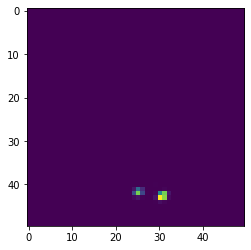

In [51]:
print(MR_out["10"])
print(SR_out["10"])
plt.figure()
plt.imshow(density_out["10"][:,:,3])